In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages')
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
from preprocessing import *
from helper import *

Number of routes after scraping: 30642
Number of routes after cleaning: 25099


In [3]:
# Display MB image

# show_image()

In [4]:
# display example of a route

# r = {'start': [[0,0]], 'mid': [[2,2], [6,6]], 'end': [[0,17],[4,17]]}
# display_route(r)

In [5]:
# grade map
print(grade_map)

{'6B': 0, '6B+': 0, '6C': 1, '6C+': 1, '7A': 2, '7A+': 3, '7B': 4, '7B+': 4, '7C': 5, '7C+': 6, '8A': 6, '8A+': 6, '8B': 6}


## Distribution of grades

In [6]:
all_grades = []

repeats_list = [0] * 7

number_of_holds_list = []

for key, item in mb_2016.items():
    all_grades.append(item['grade'] + 4)
    grade = item['grade']
    repeats = item['repeats']
    repeats_list[grade] += repeats
    number_of_holds_list.append(len(item['start']) + len(item['mid']) + len(item['end']))

all_grades_count = []
all_grades_percentages = []

for i in range(4, 11):
    n = all_grades.count(i)
    all_grades_count.append(n)
    all_grades_percentages.append(n*100/len(all_grades))

repeats_total = sum(repeats_list)
repeats_percentages = []
for i in repeats_list:
    repeats_percentages.append(i*100/repeats_total)

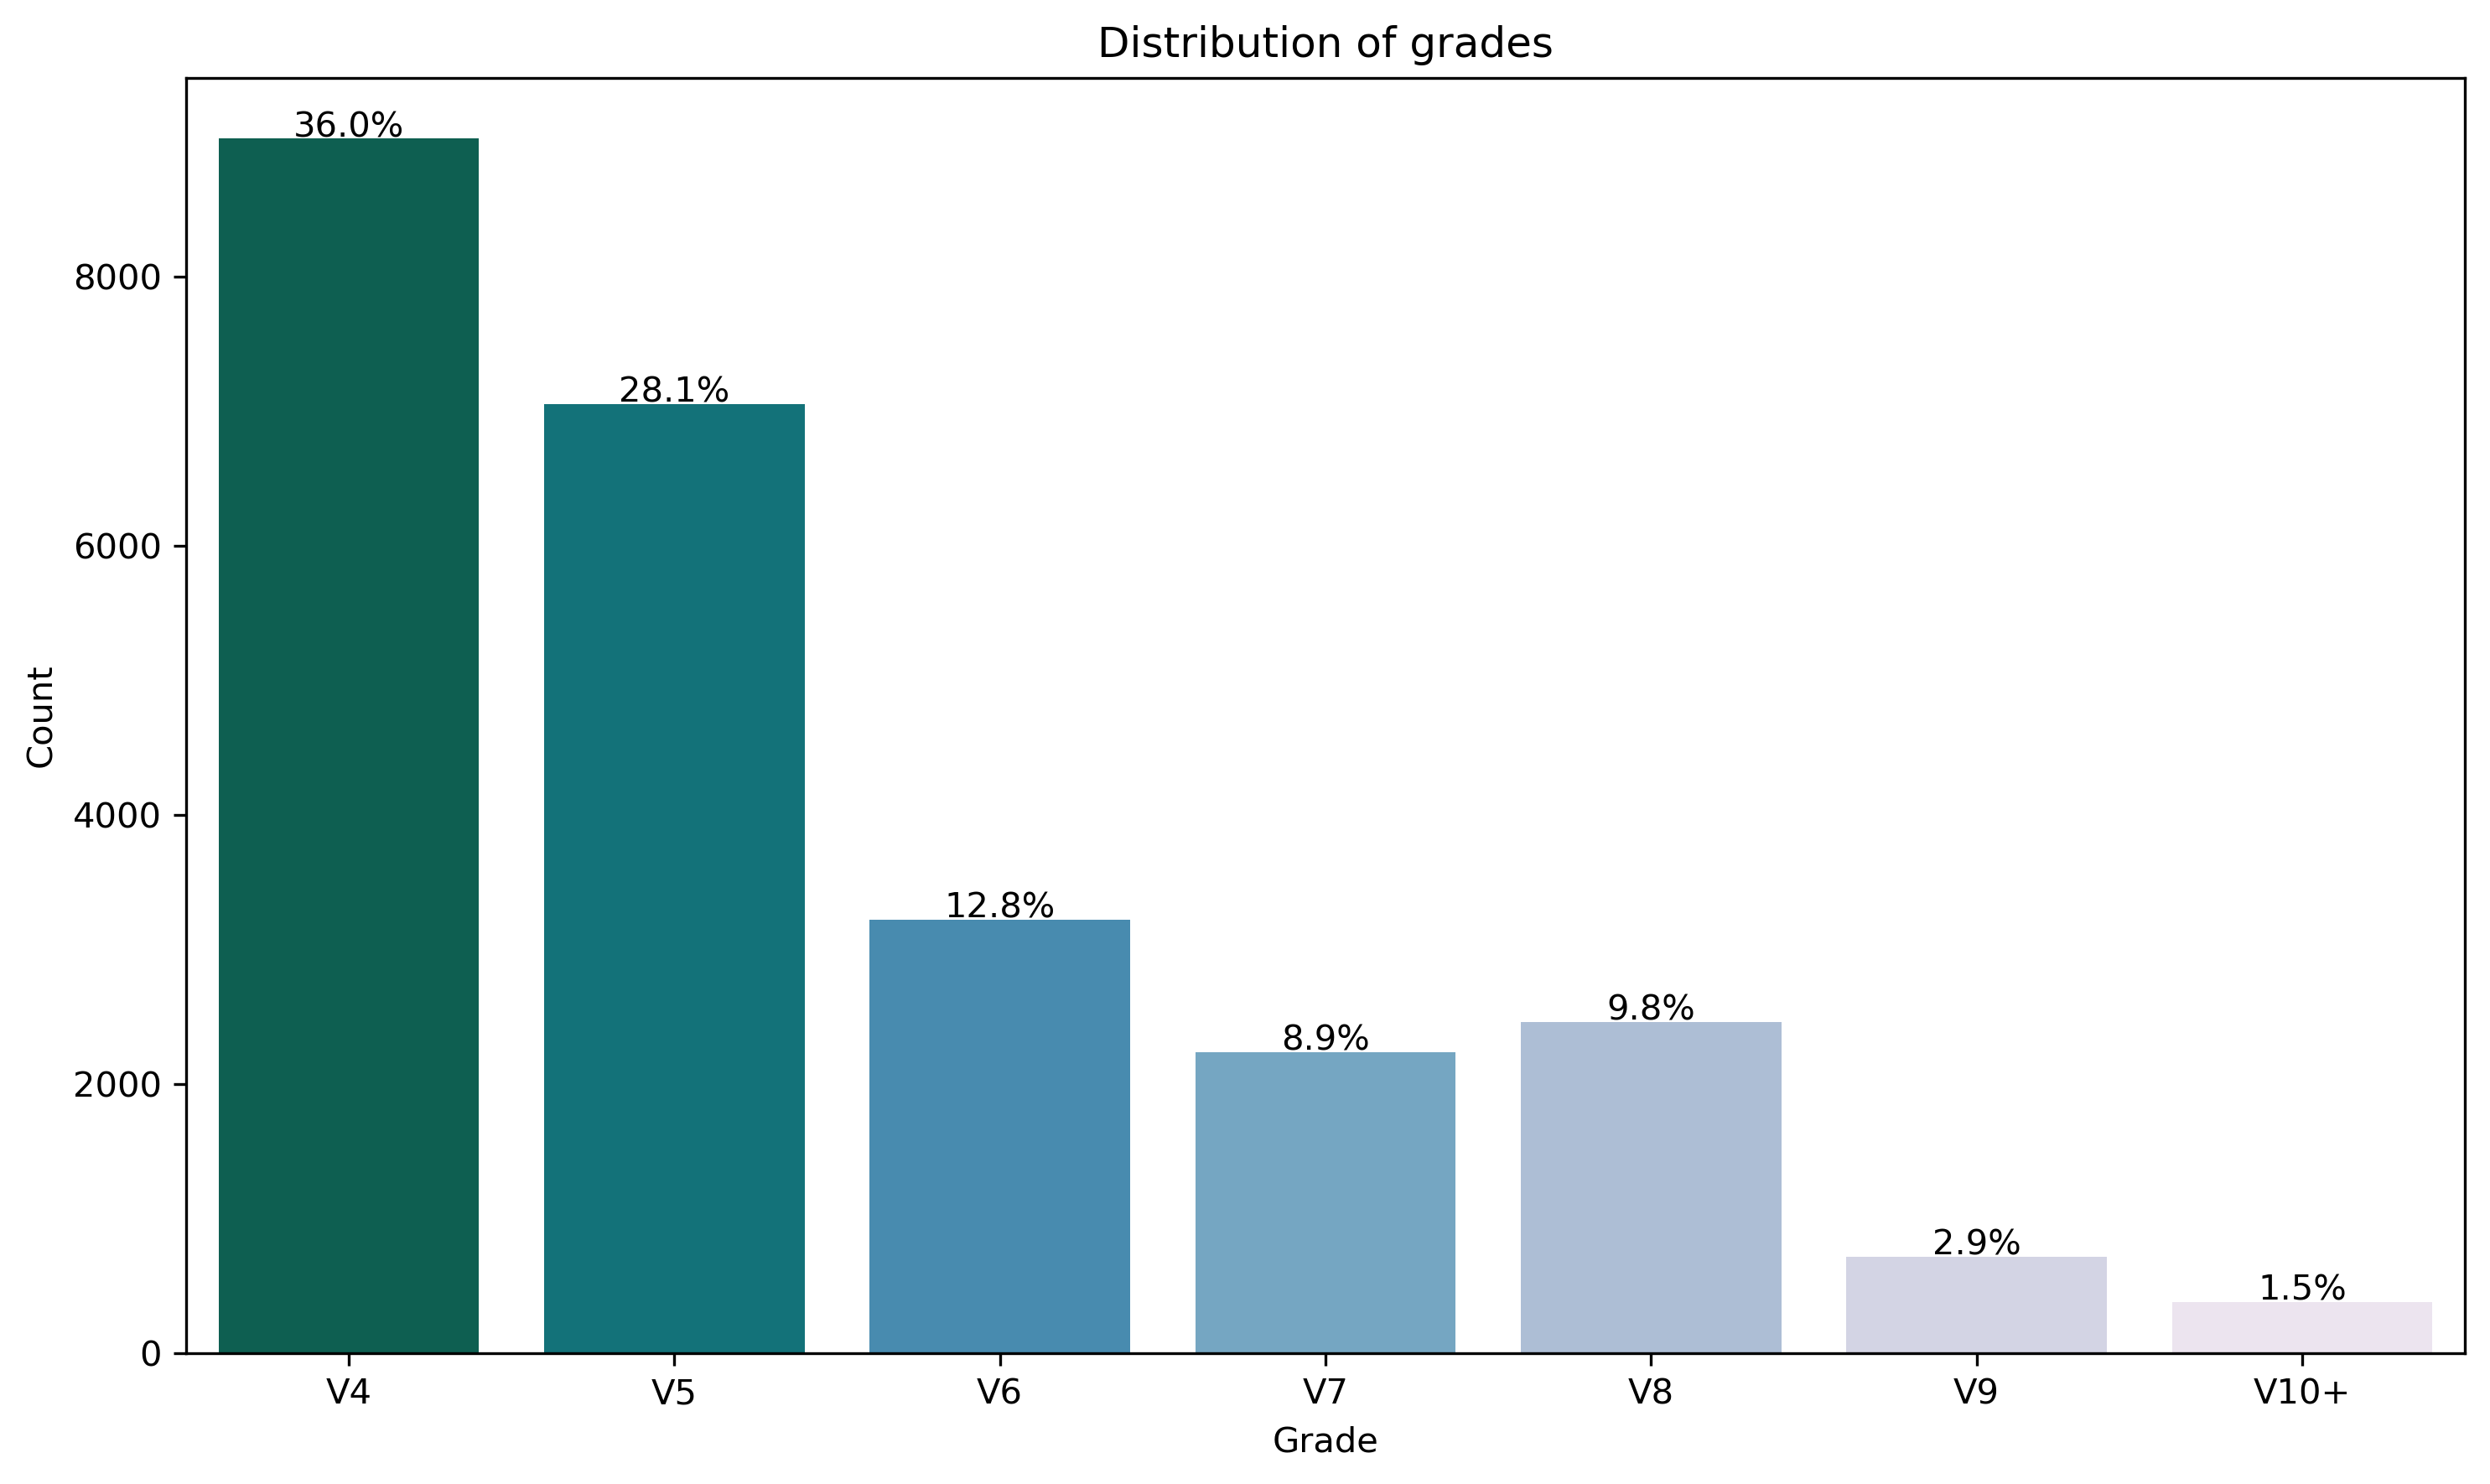

In [7]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
x = ['V4','V5','V6','V7','V8','V9','V10+']
y = all_grades_count
percentage = all_grades_percentages
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r')
ax.set(xlabel='Grade', ylabel='Count', title = 'Distribution of grades')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

In [8]:
print(all_grades_count)

[9026, 7055, 3221, 2239, 2460, 716, 382]


## Distribution of repeats

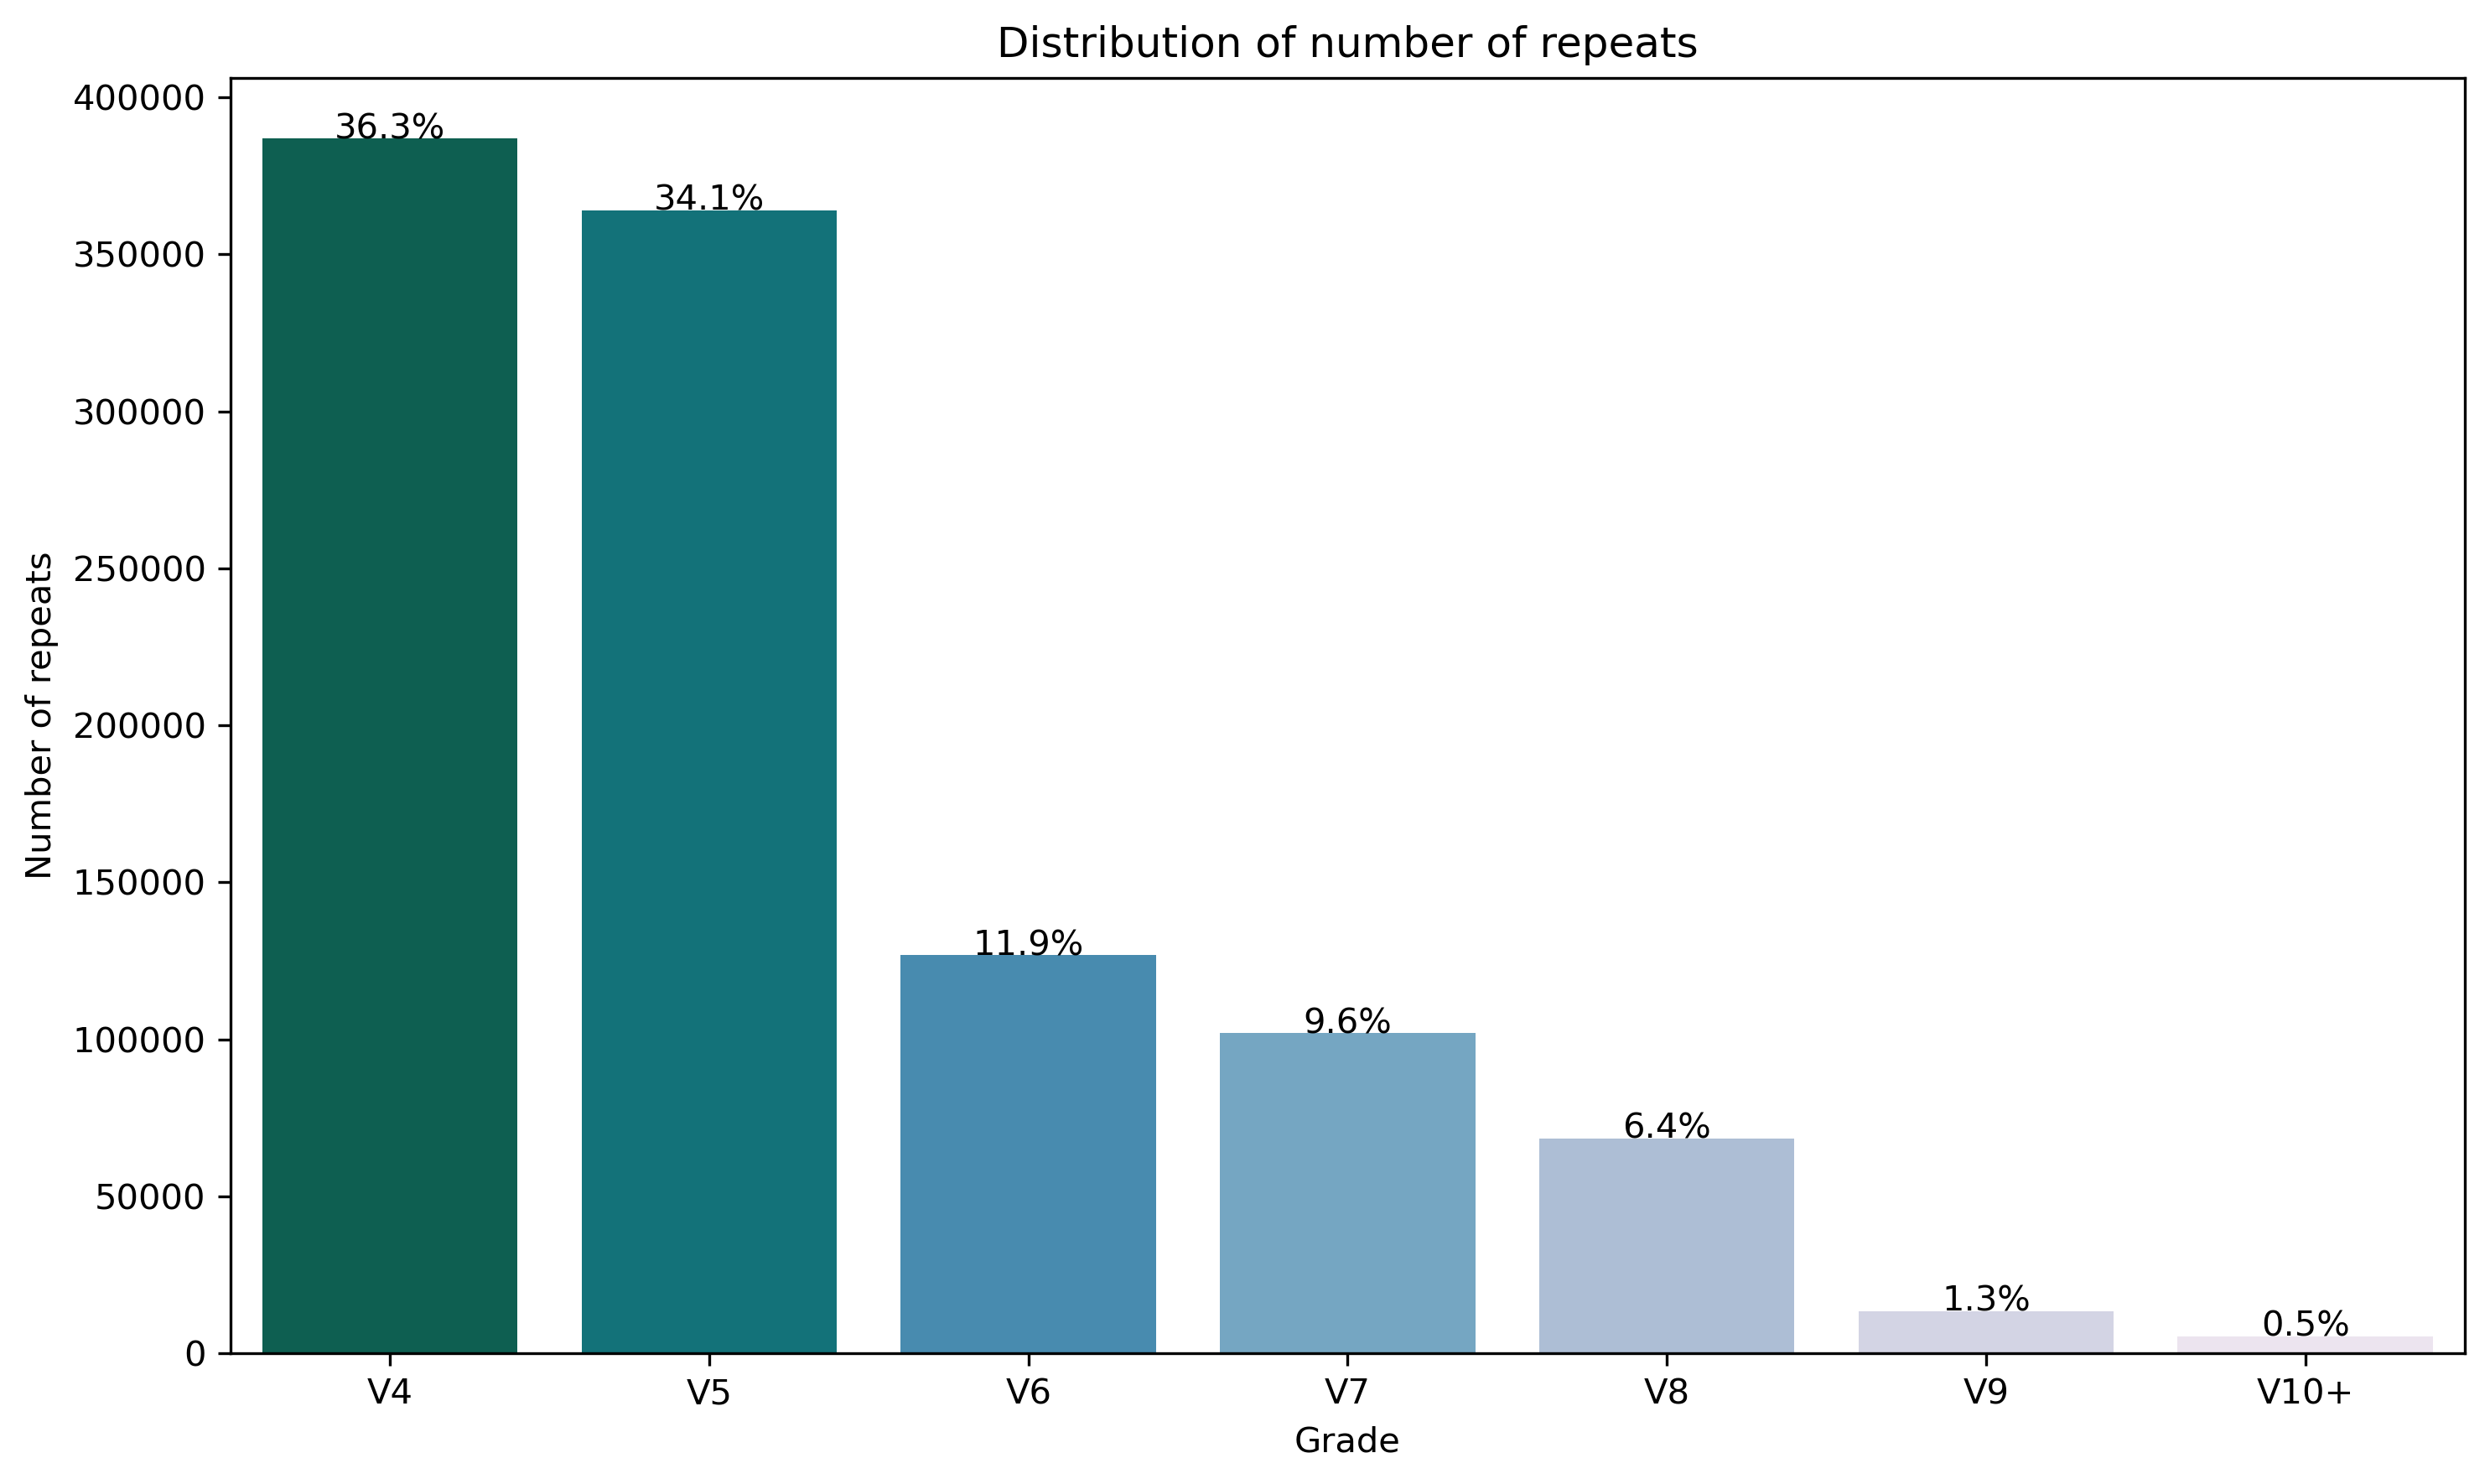

In [9]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
x = ['V4','V5','V6','V7','V8','V9','V10+']
y = repeats_list
percentage = repeats_percentages
ax = sns.barplot(x=x, y=y, palette='PuBuGn_r')
ax.set(xlabel='Grade', ylabel='Number of repeats', title = 'Distribution of number of repeats')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

## Distribution of number of holds

Text(0.5, 0.98, 'Number of Holds Distribution for Each Grade')

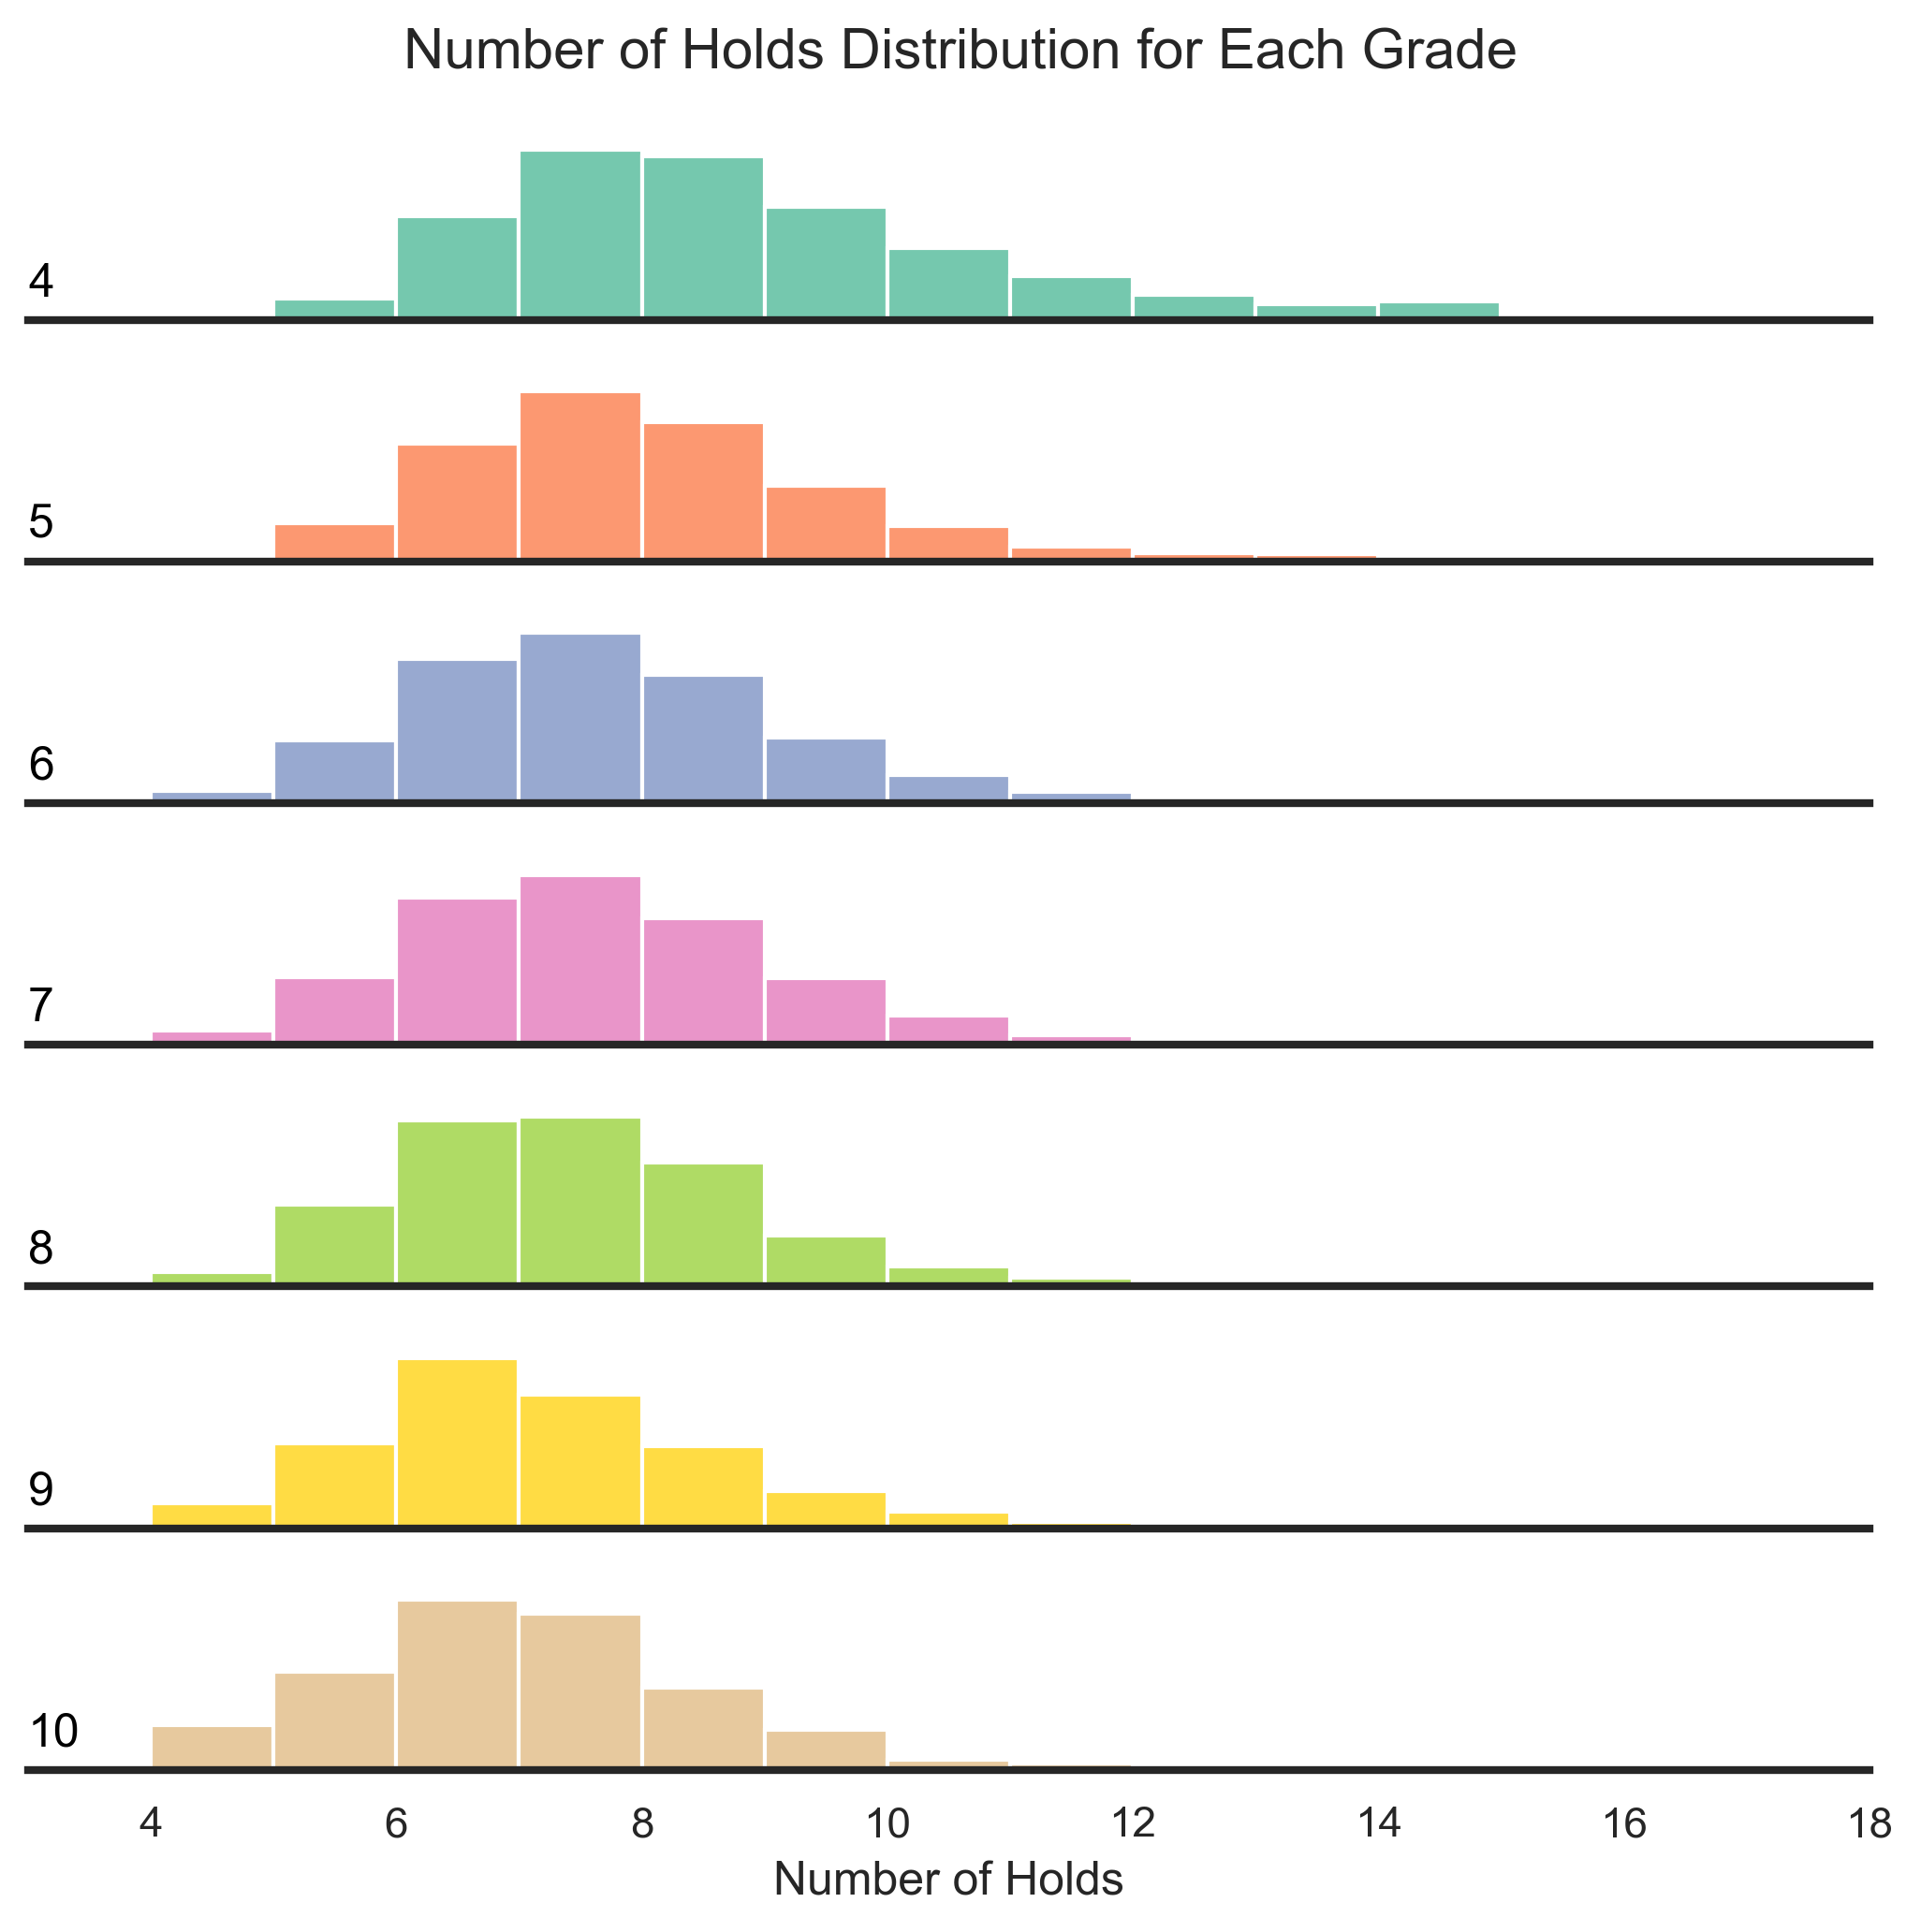

In [10]:
df_dict = {'grade': all_grades, 'number of holds': number_of_holds_list}
df = pd.DataFrame(df_dict)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="grade", hue="grade", aspect=7, height=1, sharey=False)
g.set(xlim=(3, 18))
g.map_dataframe(sns.histplot, x="number of holds", alpha=0.9, binwidth = 1)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=12,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "grade")
g.fig.subplots_adjust(hspace=5)
g.set_titles("")
g.set(yticks=[], xlabel="Number of Holds")
g.despine(left=True)
plt.suptitle('Number of Holds Distribution for Each Grade', y=0.98)

## Heat Maps

In [11]:
mb_2016_grades = {}
for key in mb_2016:
    mb_2016_grades[key] = mb_2016[key]['grade']

In [12]:
heat_all = heat_matrix(mb_2016, [*range(0,10)])
heat_v4_5 = heat_matrix(mb_2016, [0, 1])
heat_v6_9 = heat_matrix(mb_2016, [2, 3, 4, 5])
heat_v10_13= heat_matrix(mb_2016, [6])

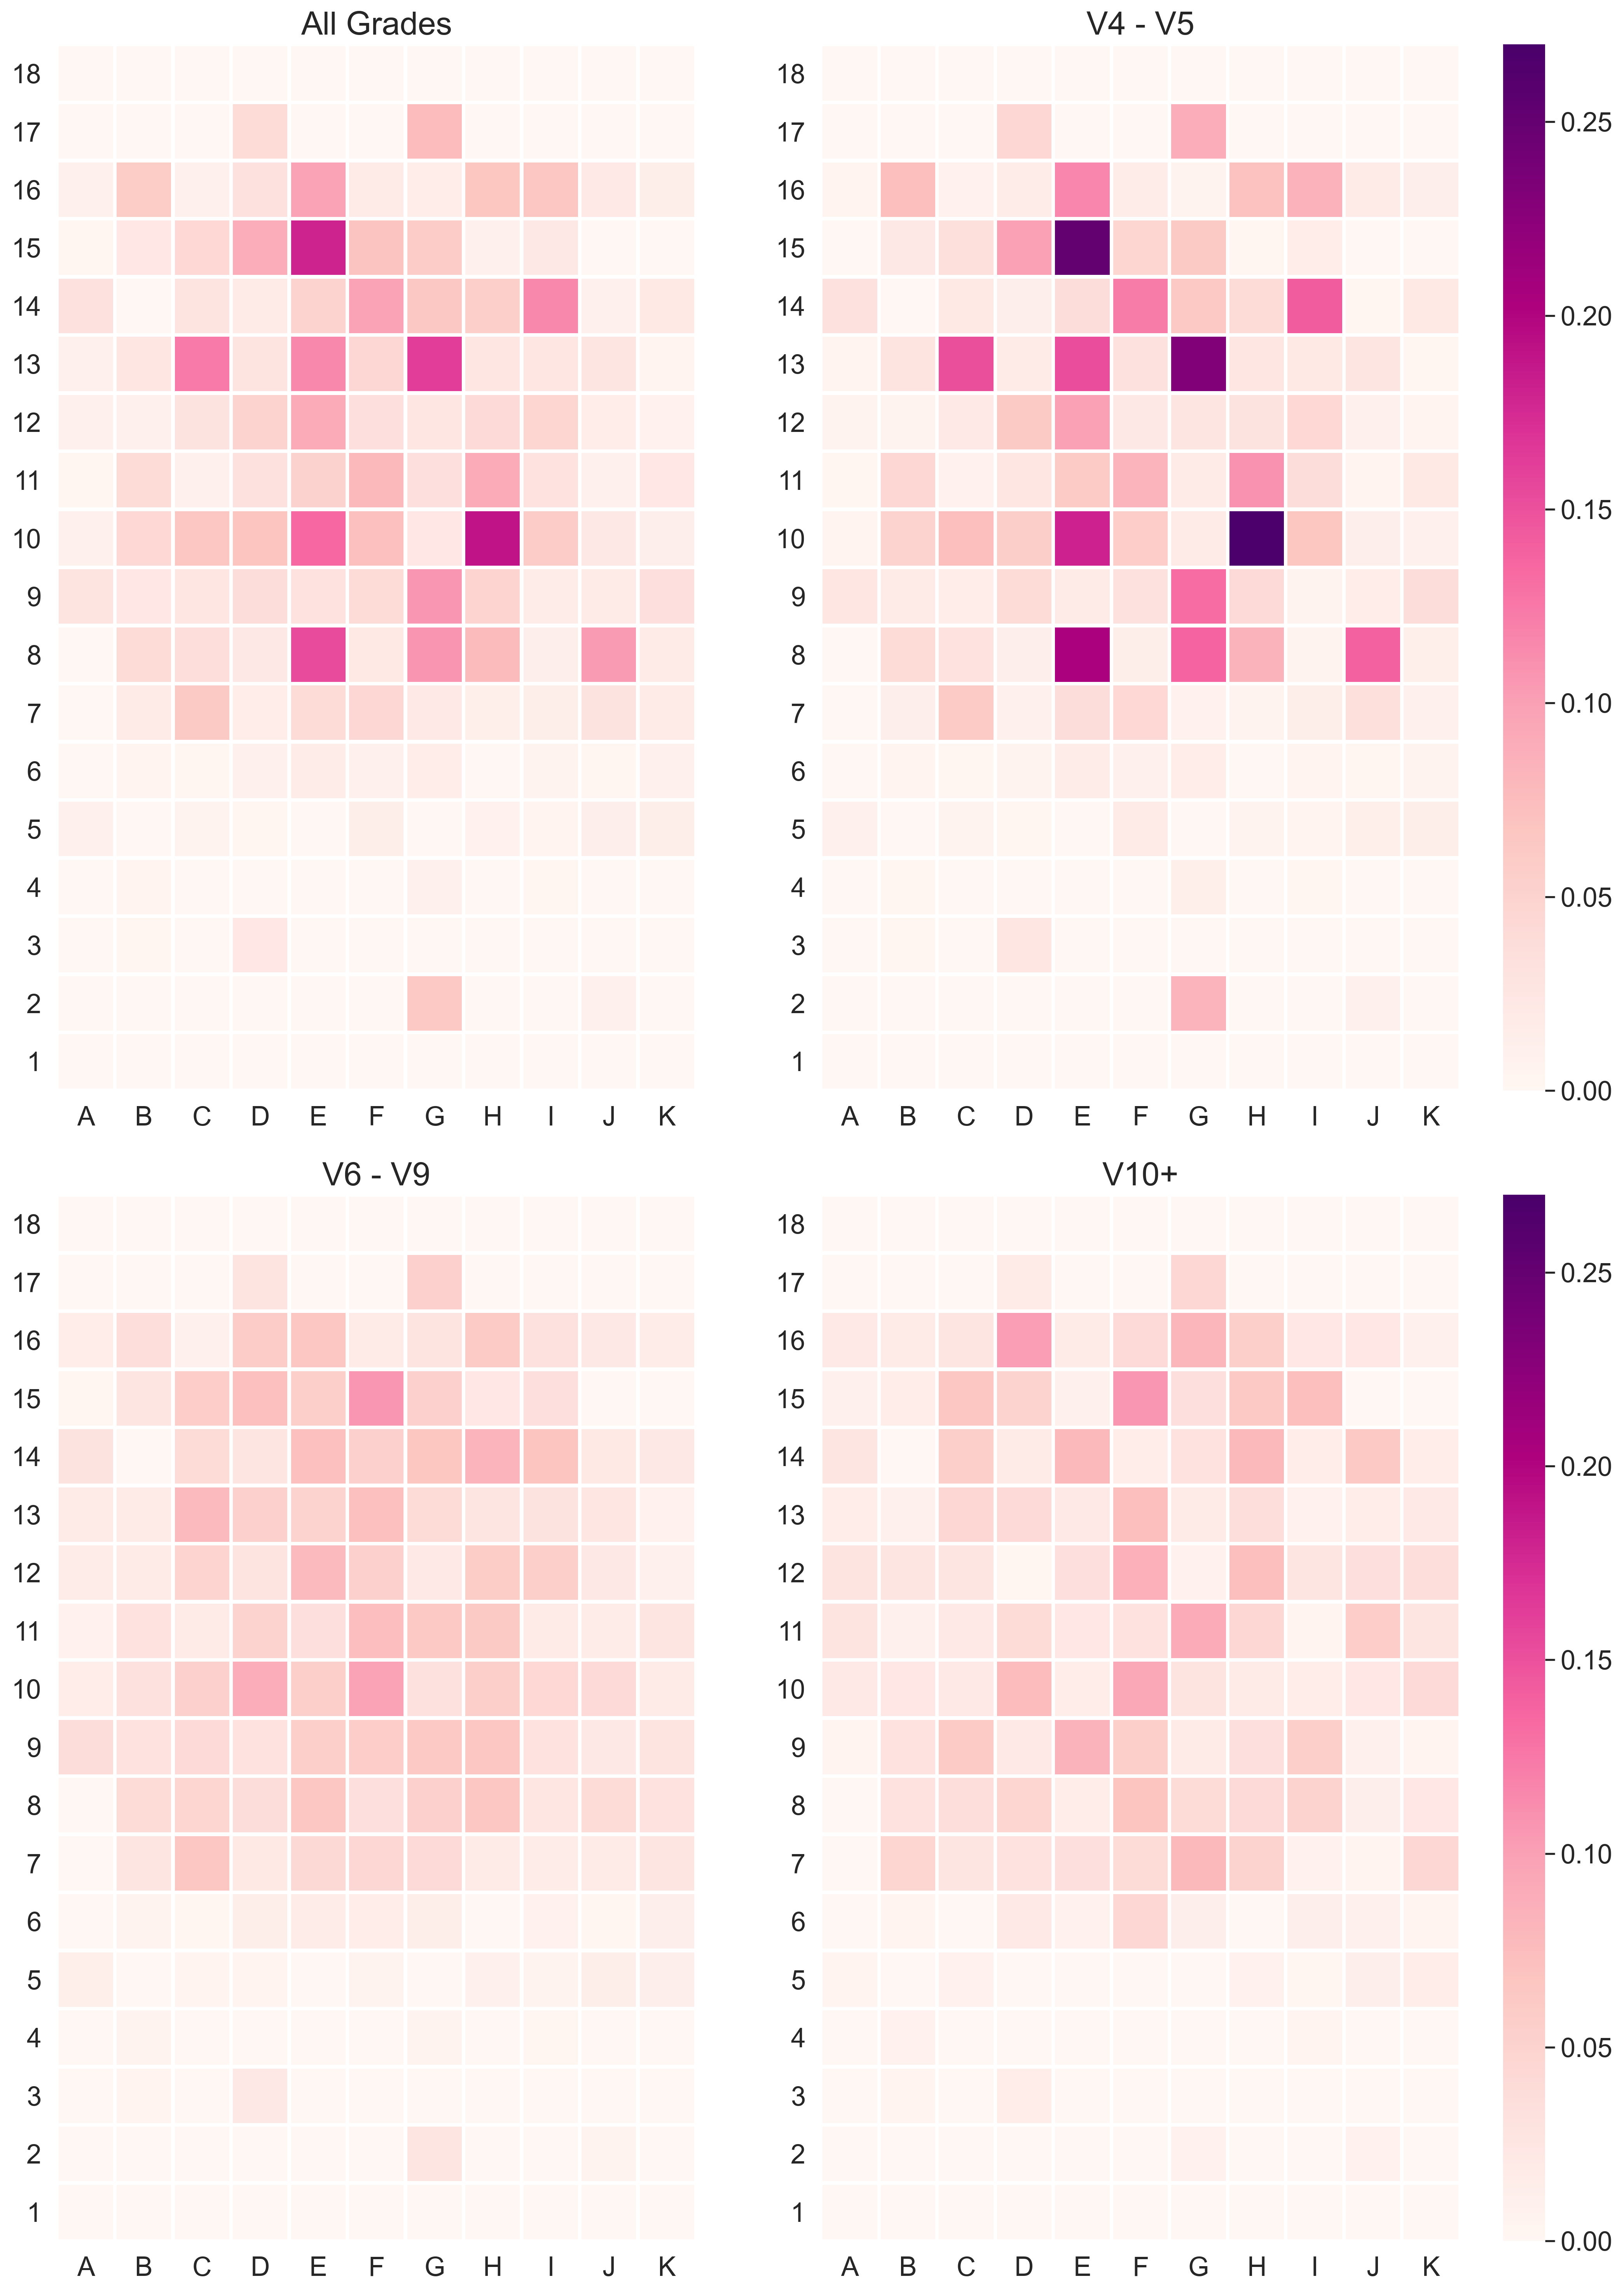

In [13]:
fig = plt.figure(figsize=(15, 20))
sns.set(font_scale=1.5)

x_list = ['A','B','C','D','E','F','G','H','I','J','K']

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

sns.heatmap(heat_all, ax=ax1, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar=False)
sns.heatmap(heat_v4_5, ax=ax2, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar_kws={"aspect": 25})
sns.heatmap(heat_v6_9, ax=ax3, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar=False)
sns.heatmap(heat_v10_13, ax=ax4, linewidth=2, xticklabels = x_list, cmap="RdPu", square = True, vmin=0, vmax=0.27, cbar_kws={"aspect": 25})

ax1.set_yticklabels(range(18, 0, -1),rotation=0)
ax2.set_yticklabels(range(18, 0, -1),rotation=0)
ax3.set_yticklabels(range(18, 0, -1),rotation=0)
ax4.set_yticklabels(range(18, 0, -1),rotation=0)

ax1.set_title('All Grades', fontsize=20)
ax2.set_title('V4 - V5', fontsize=20)
ax3.set_title('V6 - V9', fontsize=20)
ax4.set_title('V10+', fontsize=20)

plt.show()

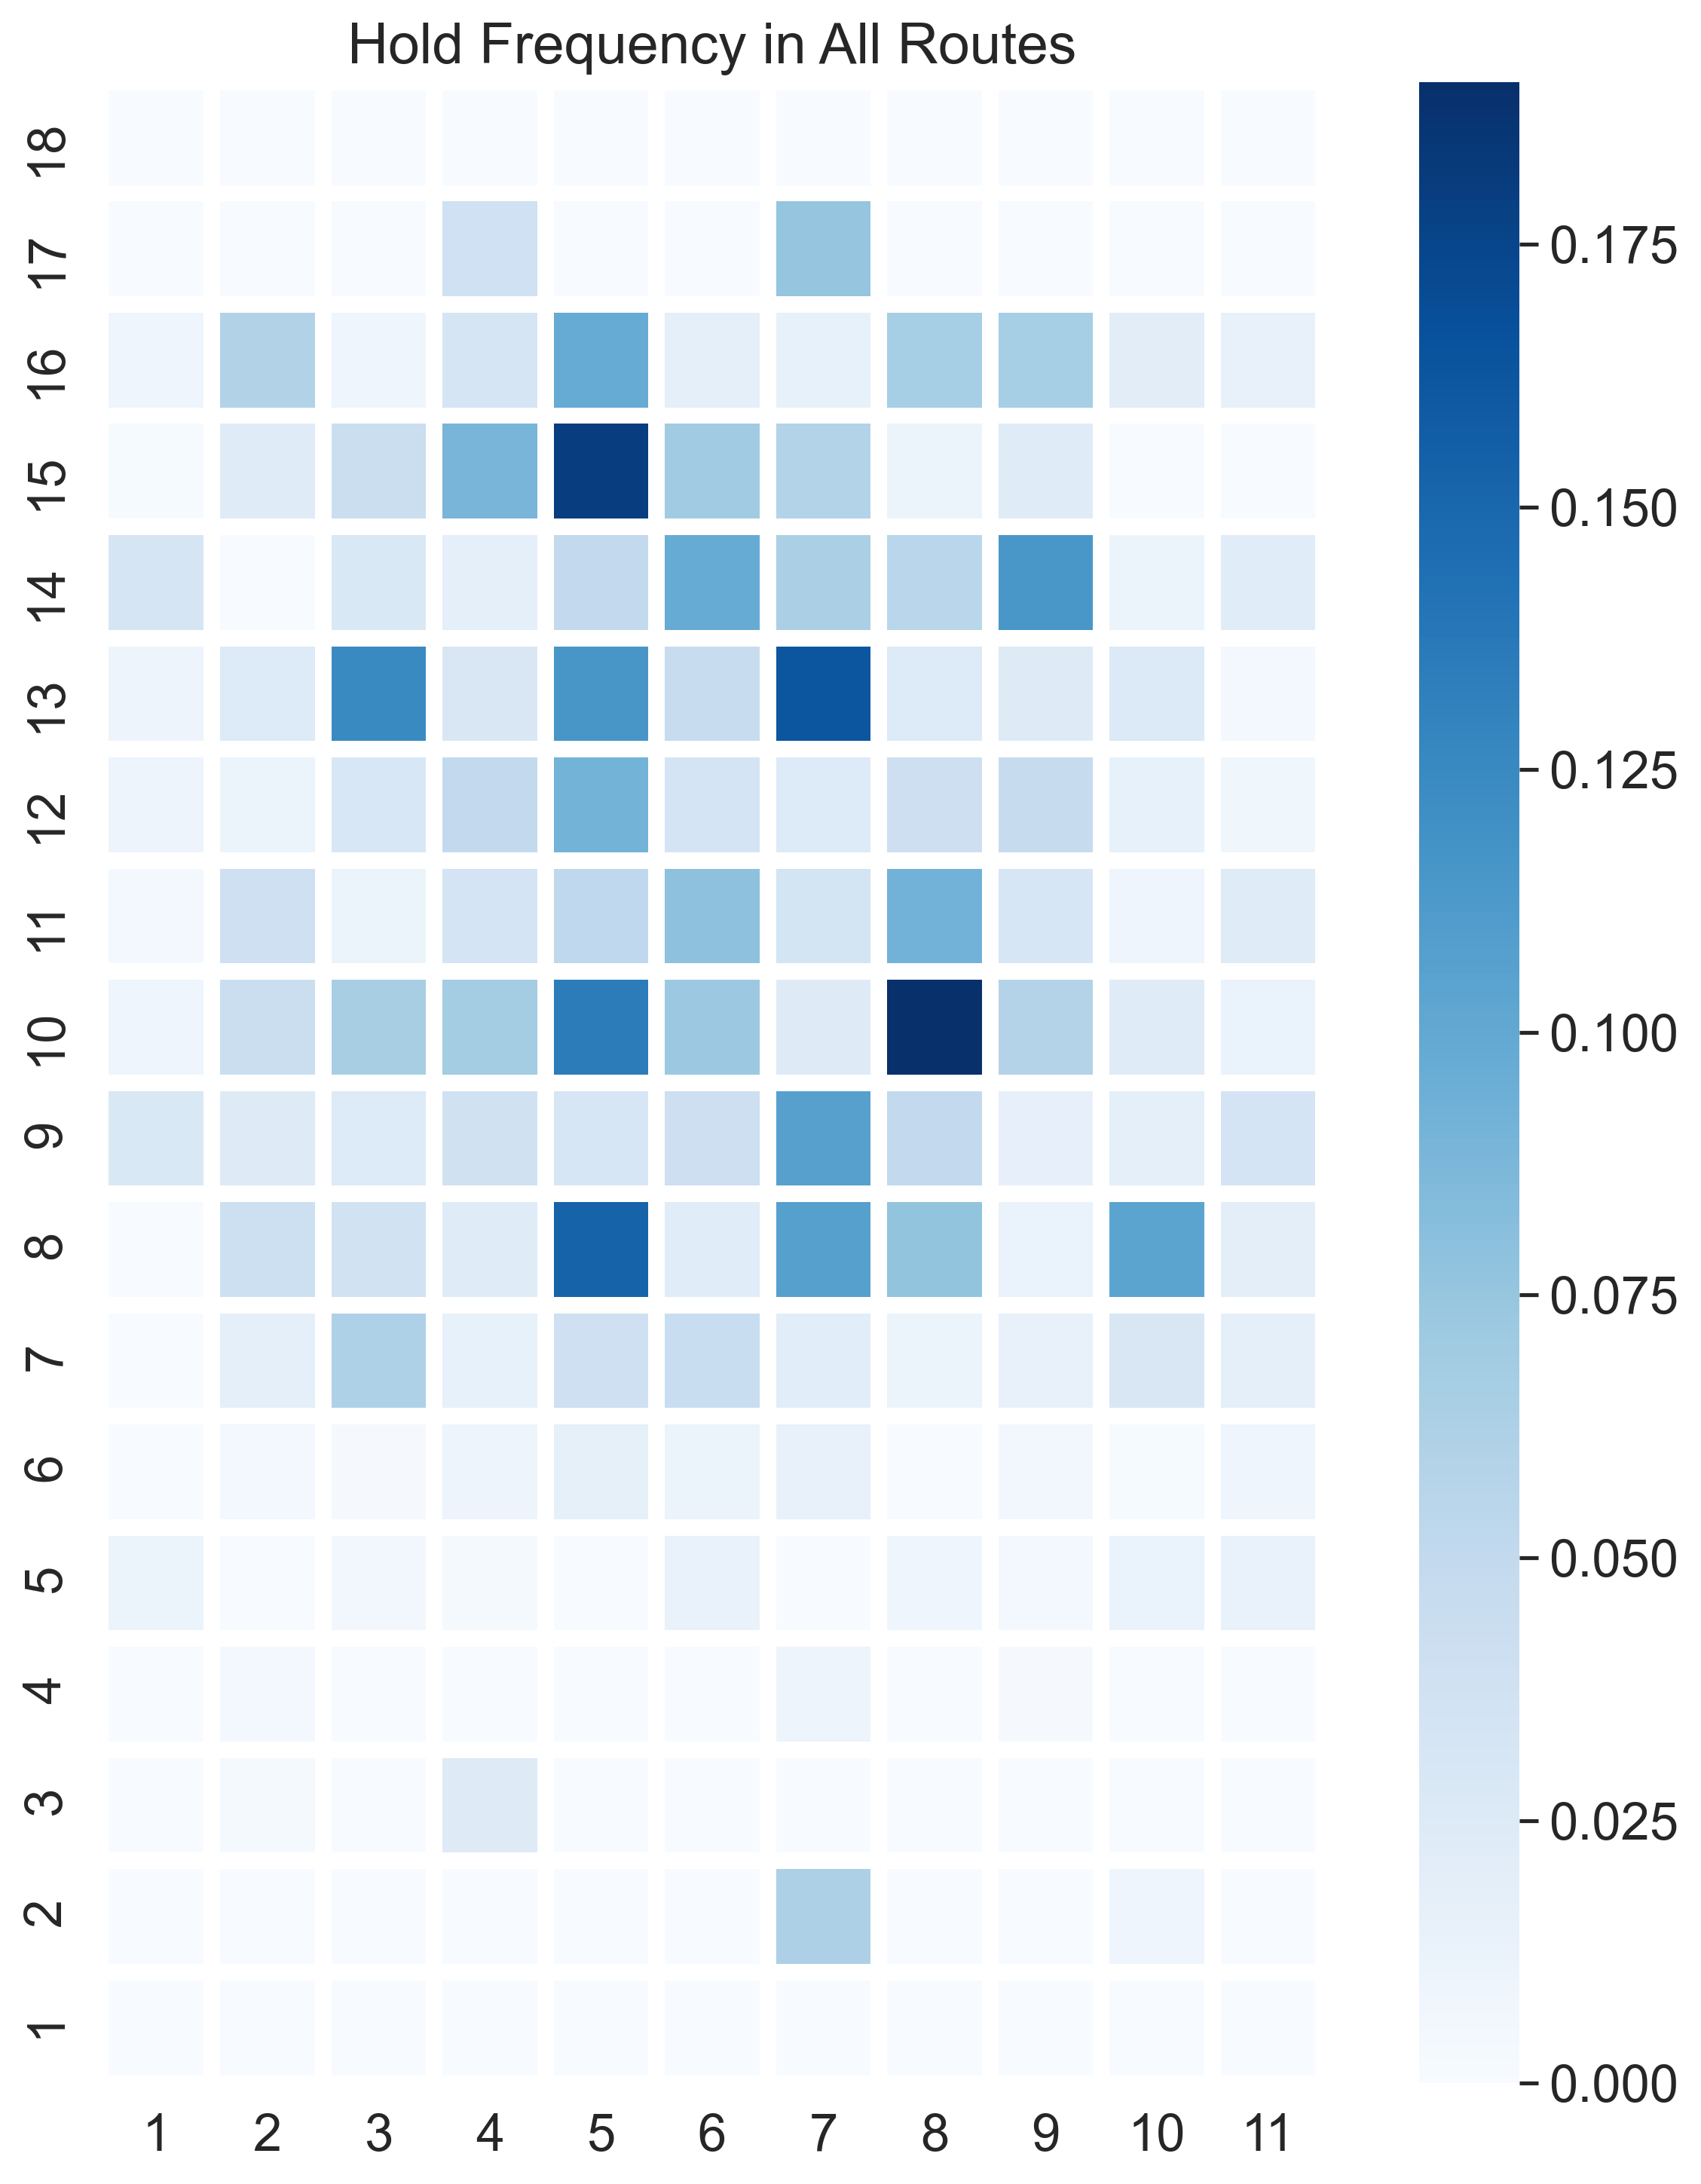

In [14]:
# plot individual graphs
heat_all = heat_matrix(mb_2016, [*range(0,10)])
heat_v4 = heat_matrix(mb_2016, [0])

plt.figure(figsize=(9, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_all, linewidth=5, xticklabels = range(1, 12), yticklabels = range(18, 0, -1), cmap="Blues", square = True)
plt.title('Hold Frequency in All Routes')
plt.show()

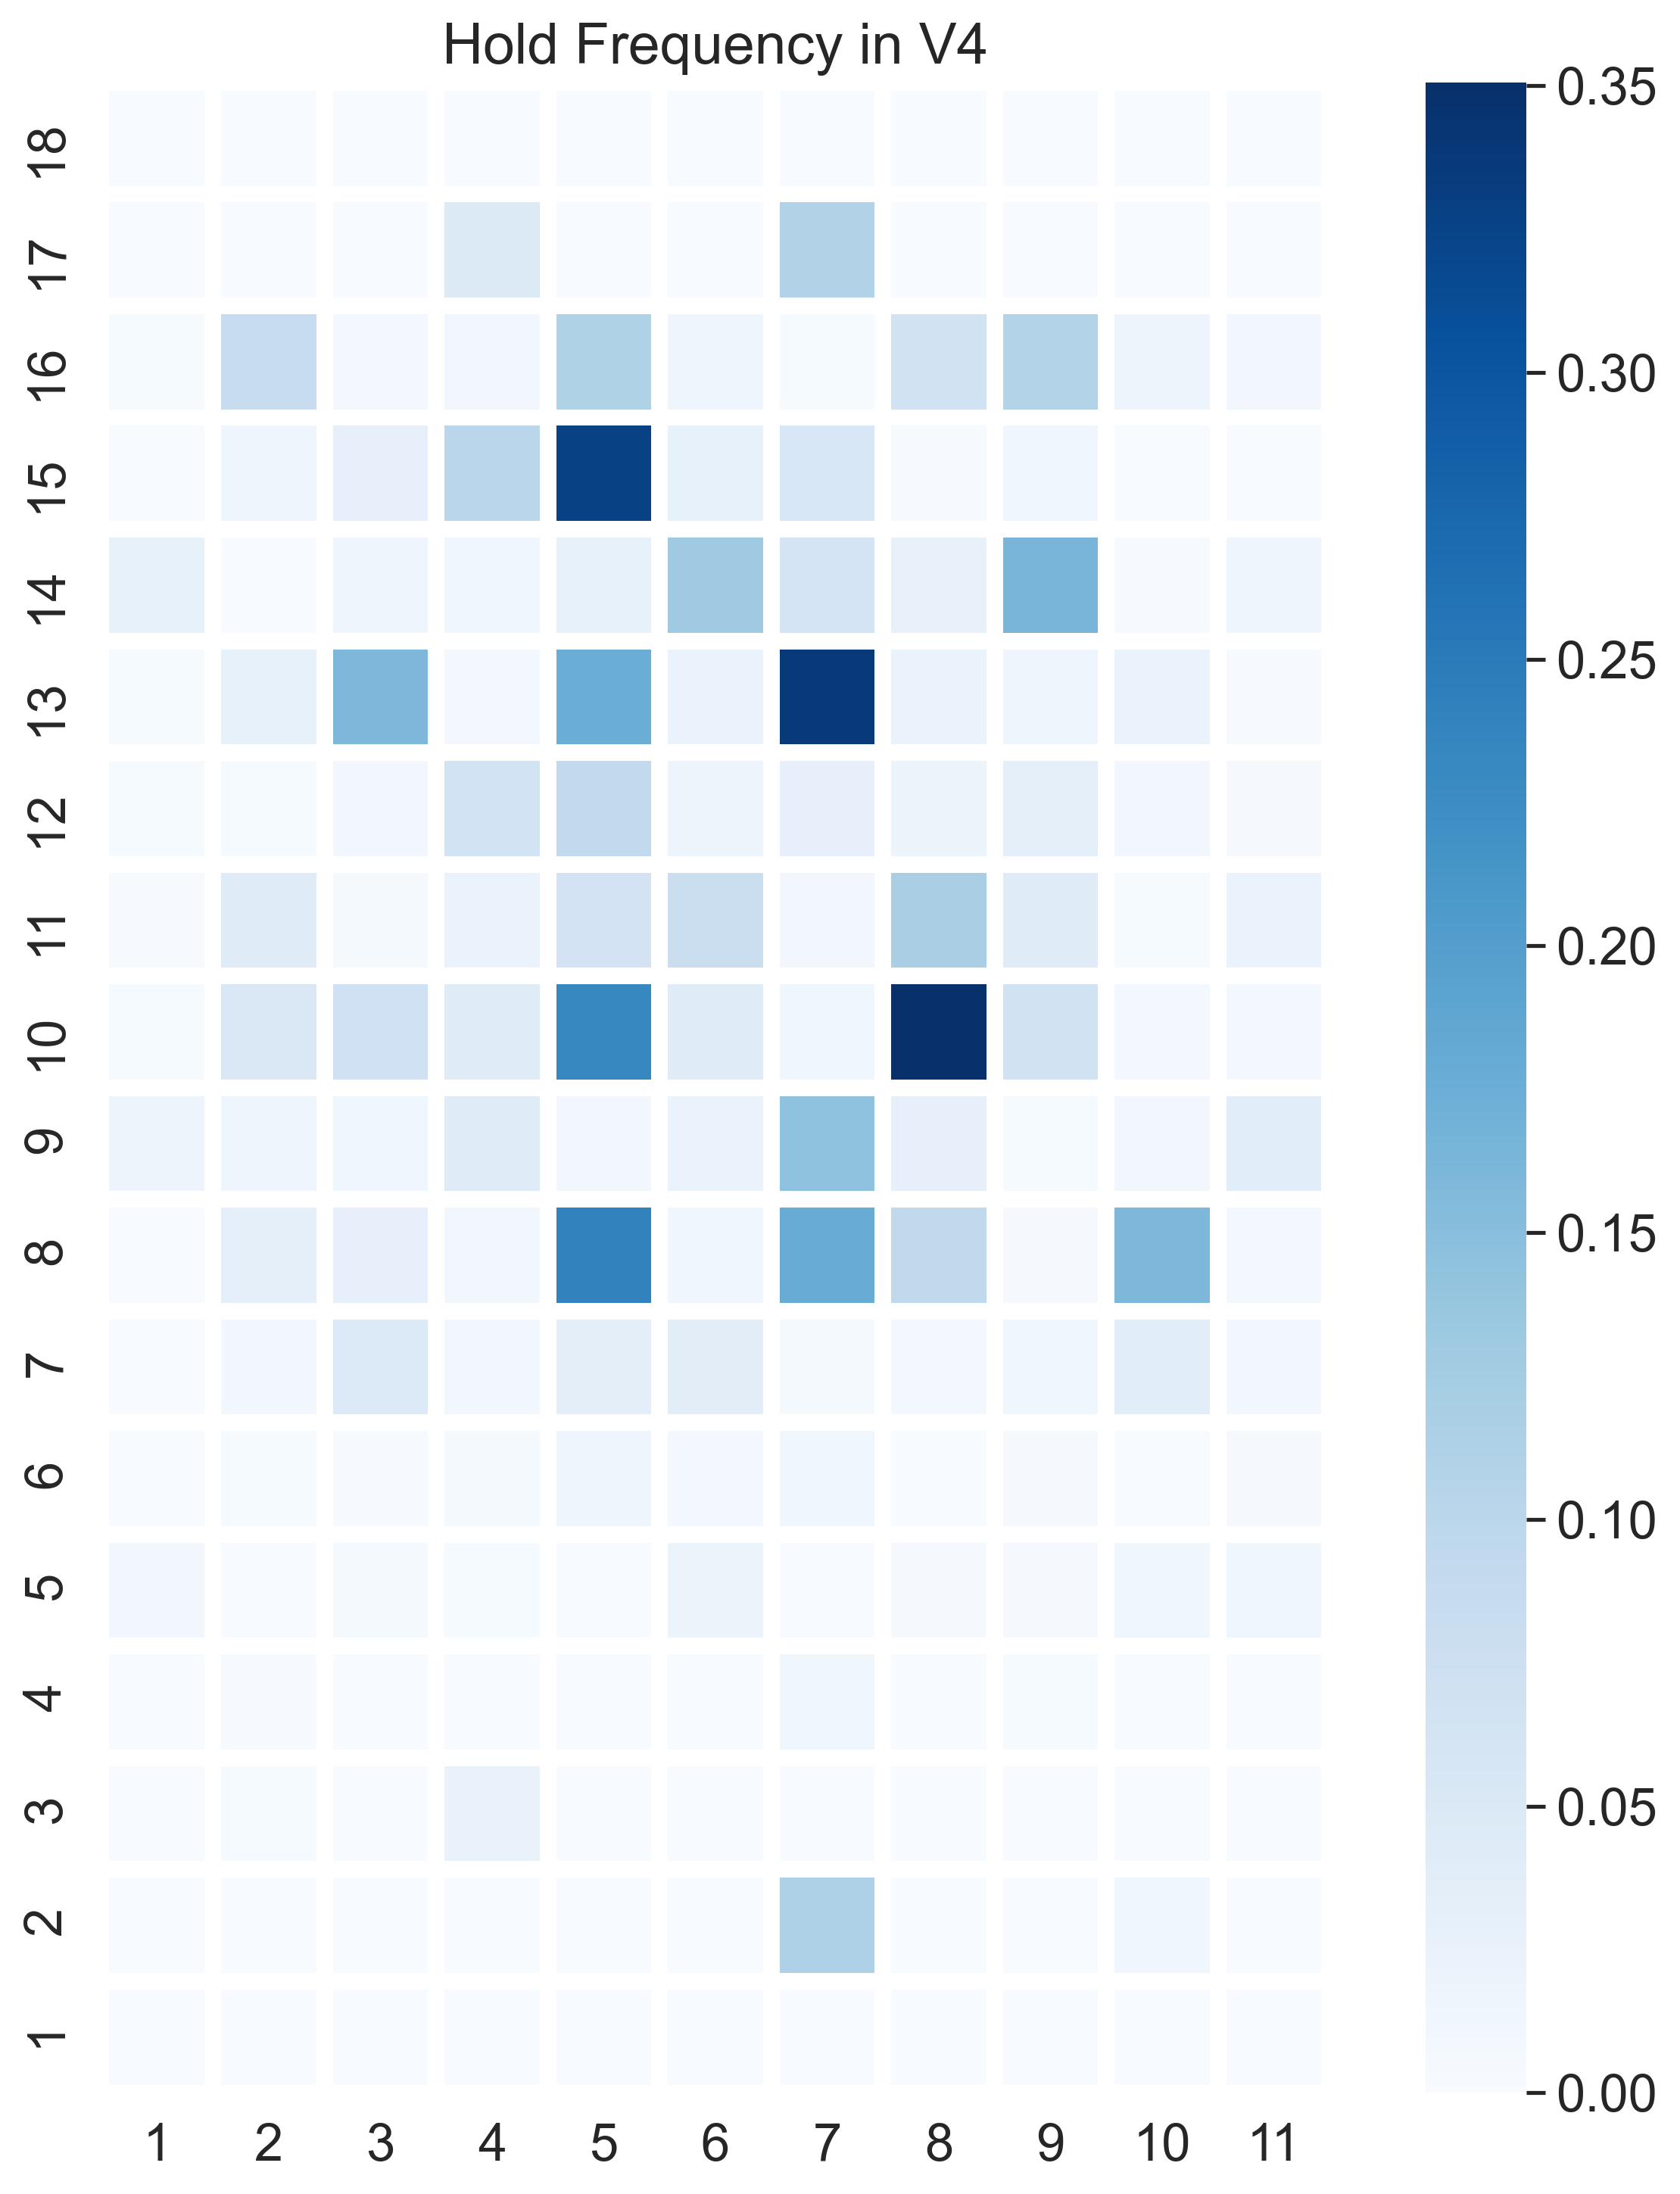

In [15]:
plt.figure(figsize=(9, 10))
sns.set(font_scale=1.5)
ax = sns.heatmap(heat_v4, linewidth=5, xticklabels = range(1, 12), yticklabels = range(18, 0, -1), cmap="Blues", square = True)
plt.title('Hold Frequency in V4')
plt.show()

## PCA Analysis

In [16]:
matrices = get_matrices(mb_2016, ['start','mid','end'])[0]

# reshaped
vectors = {}
for i in matrices:
    vectors[i] = np.array(matrices[i]).reshape(1, 198)
grades = {}
for key in mb_2016:
    grades[key] = mb_2016[key]['grade']

grades_list = list(grades.values())
vectors_list = list(vectors.values())

data = []

for i in range(len(grades_list)):
    data.append([])
    
    vector = vectors_list[i][0]
    grade = grades_list[i]
    for j in range(11*18):
        data[i].append(vector[j])
    data[i].append(grade)

df = pd.DataFrame(data)
df.rename(columns = {198:'Grade'}, inplace = True)
#df

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

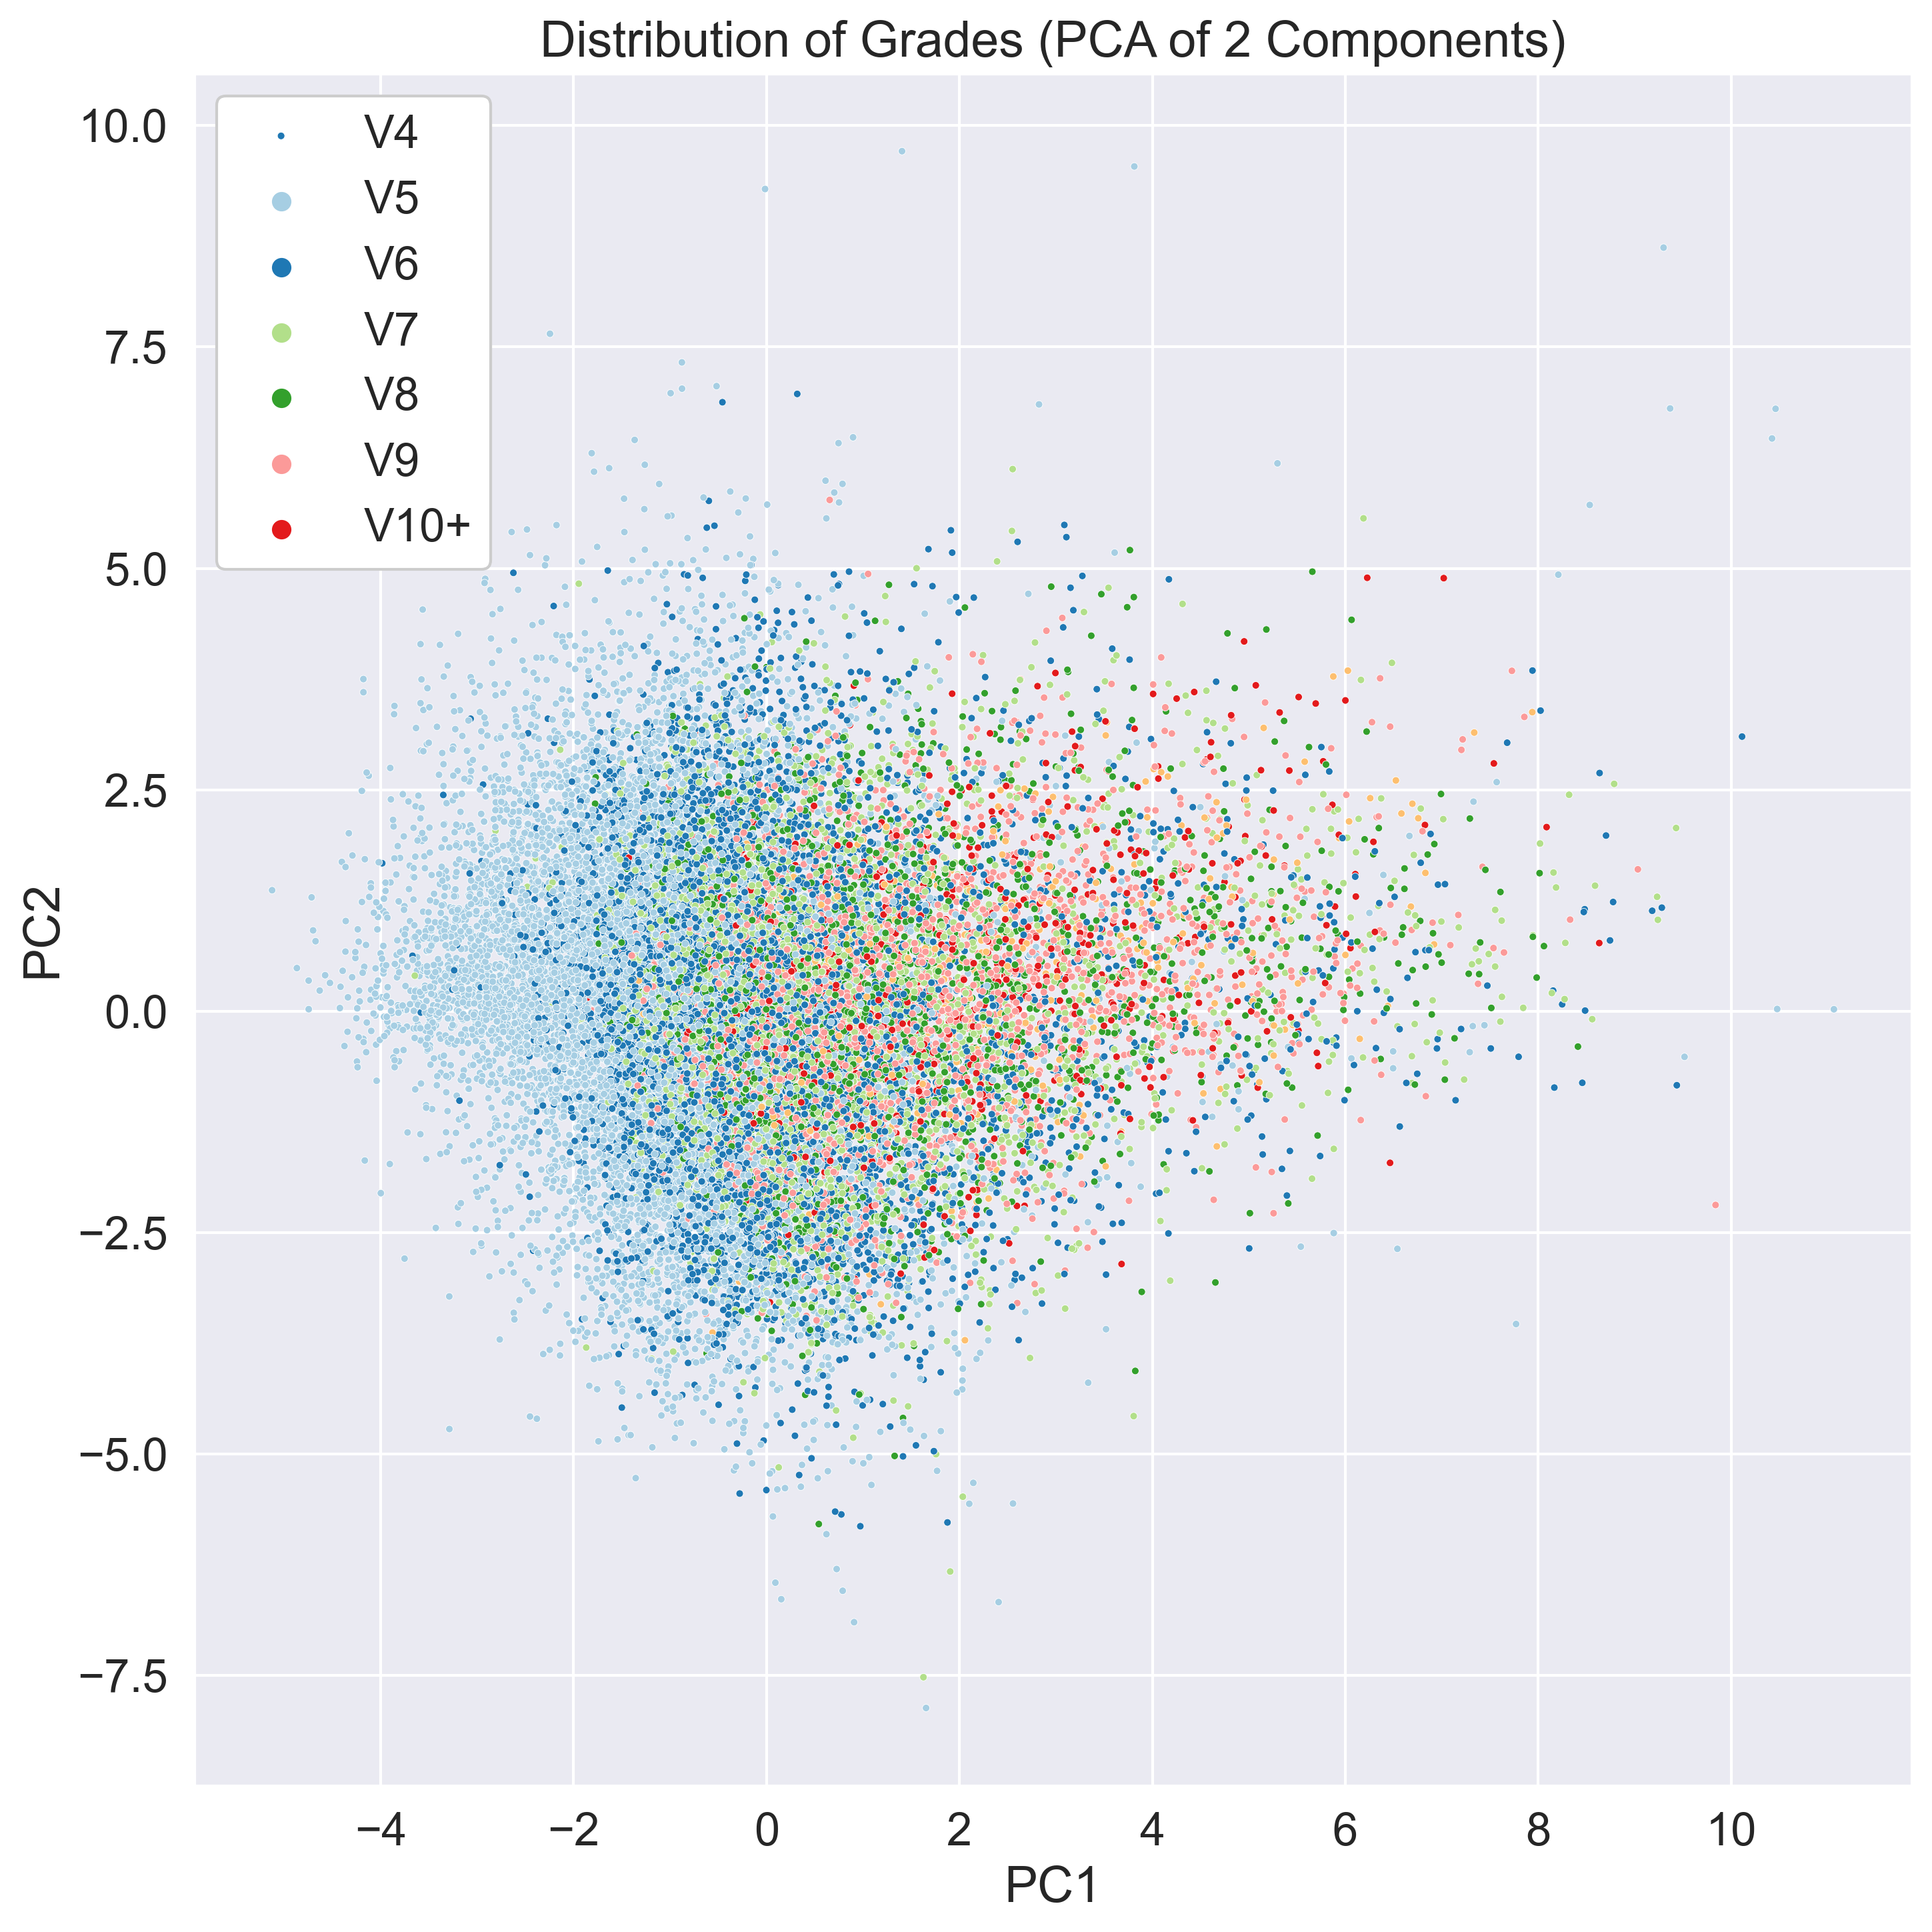

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

plt.rcParams["figure.figsize"] = [10, 10]

ax = sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=y, palette="Paired", s = 7)
ax.set(xlabel='PC1', ylabel='PC2', title = 'Distribution of Grades (PCA of 2 Components)')
plt.legend(labels= ['V4','V5','V6','V7','V8','V9','V10+'], facecolor='white', framealpha=1)
plt.show()

## Save data to pickle

In [26]:
df_cleaned = pd.DataFrame(mb_2016).T
df_cleaned.head()
df_cleaned.to_csv('cleaned.csv')

In [27]:
print(mb_2016['367892'])

{'start': [[0, 4], [3, 5]], 'mid': [[4, 8], [0, 8], [2, 12], [3, 14]], 'end': [[0, 17]], 'grade': 1, 'user_grade': None, 'is_benchmark': False, 'repeats': 1, 'url': 'https://moonboard.com/Problems/View/367892/cats-are-furry-children'}


In [22]:
dff = pd.read_csv('cleaned.csv', index_col=False)
dff = dff.rename(columns={'Unnamed: 0': 'ID'})
dff.head()

,ID,start,mid,end,grade,user_grade,is_benchmark,repeats,url
0,367892,"[[0, 4], [3, 5]]","[[4, 8], [0, 8], [2, 12], [3, 14]]","[[0, 17]]",1,NaN,False,1,https://moonboard.com/Problems/View/367892/cat...
1,367885,"[[0, 4]]","[[1, 7], [3, 11], [5, 13]]","[[8, 17]]",2,NaN,False,1,https://moonboard.com/Problems/View/367885/gulag
2,367880,"[[5, 4], [8, 3]]","[[7, 7], [7, 9], [7, 12], [4, 14]]","[[6, 17]]",0,NaN,False,1,https://moonboard.com/Problems/View/367880/sma...
3,367874,"[[5, 4]]","[[4, 7], [1, 10], [4, 12], [6, 12], [6, 16]]","[[6, 17]]",0,NaN,False,4,https://moonboard.com/Problems/View/367874/min...
4,367871,"[[5, 4]]","[[3, 16], [6, 12], [6, 10]]","[[2, 17]]",2,NaN,False,1,https://moonboard.com/Problems/View/367871/la-...


In [23]:
import pickle
pickle.dump(mb_2016, open('cleaned.p', 'wb'))

In [28]:
with open('cleaned.p', 'rb') as f:
    xx = pickle.load(f)

In [40]:
print(heat_all/(max(heat_all.reshape(198,1))))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.20652856 0.         0.
  0.39506173 0.         0.         0.         0.        ]
 [0.04603474 0.3130362  0.04854572 0.16865453 0.51203181 0.09395271
  0.08118853 0.34986399 0.34819    0.10629839 0.07595731]
 [0.00920695 0.12450303 0.22933668 0.46829881 0.94664156 0.36367441
  0.30947897 0.05503243 0.11927181 0.         0.        ]
 [0.16991002 0.         0.14919439 0.09353421 0.26511823 0.51496129
  0.33417033 0.29043733 0.60451977 0.05482318 0.11592383]
 [0.05335844 0.12952501 0.65306549 0.15484411 0.60619376 0.24210086
  0.85352584 0.13224524 0.12889726 0.13768571 0.02469136]
 [0.0514752  0.05628793 0.15944758 0.26135175 0.47750575 0.17953547
  0.12910651 0.21615401 0.24963381 0.08118853 0.03954802]
 [0.02176187 0.20966729 0.05775267 0.17597824 0.2697217  0.41431262
  0.18141871 0.48064449 0.16091232 0.04896422 0.1222013 ]
 [0.0460

In [39]:
heat_all.reshape((11*18, 1))

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.03932428],
       [0.        ],
       [0.        ],
       [0.07522212],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00876529],
       [0.05960397],
       [0.0092434 ],
       [0.03211283],
       [0.09749392],
       [0.01788916],
       [0.01545878],
       [0.0666162 ],
       [0.06629746],
       [0.02023985],
       [0.01446273],
       [0.00175306],
       [0.02370612],
       [0.04366708],
       [0.0891669 ],
       [0.18024622],
       [0.06924579],
       [0.05892665],
       [0.01047851],
       [0.02271007],
       [0.        ],
       [0.        ],
       [0.03235189],
       [0.        ],
       [0.02840751],
       [0.017